<a href="https://colab.research.google.com/github/leahandofir/earthformer-inference-experiments/blob/main/google_colab_experiments/ffs_library_drafts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install pysteps

!pip install pypng

In [11]:
import png
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def get_img(path):
  pixels = png.Reader(file=open(path, "rb")).asRGBA8()[2]
  np_arr = np.array([list(row) for row in pixels]).reshape(600,600,4)
  grayscale = 0.299 * np_arr[:,:,0] + 0.587 * np_arr[:,:,1] + 0.114 * np_arr[:,:,2]
  return grayscale

In [31]:
img1 = get_img("/content/drive/MyDrive/data_from_IMS/ims_ir_png_samples/202301010000.png")
img2 = get_img("/content/drive/MyDrive/data_from_IMS/ims_ir_png_samples/202301011525.png")


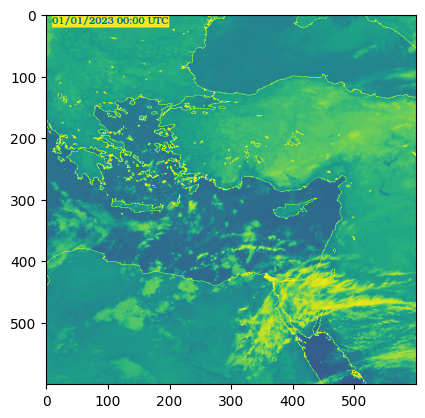

In [17]:
plt.imshow(img1)

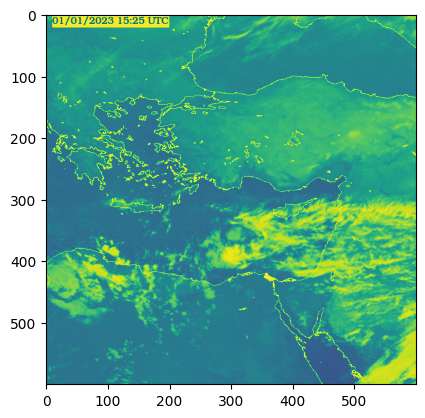

In [32]:
plt.imshow(img2)

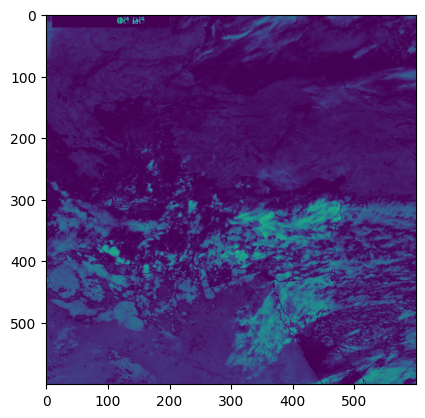

In [33]:
plt.imshow(np.abs(img1-img2))

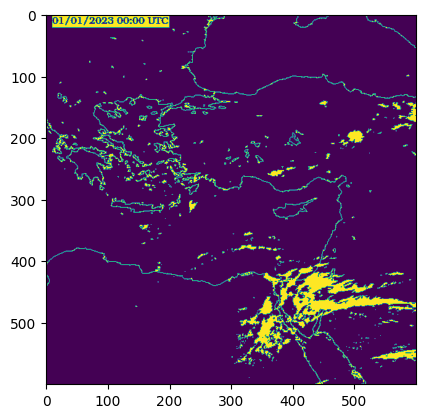

In [34]:
img_to_binary = np.vectorize(lambda pix : 255 if pix > 200 else 0)
img1_binary = img_to_binary(img1)
plt.imshow(img1_binary)

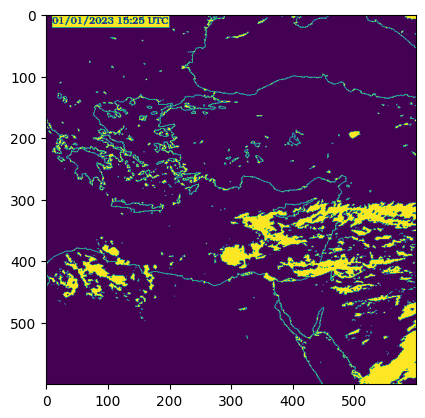

In [35]:
img_to_binary = np.vectorize(lambda pix : 255 if pix > 200 else 0)
img2_binary = img_to_binary(img2)
plt.imshow(img2_binary)

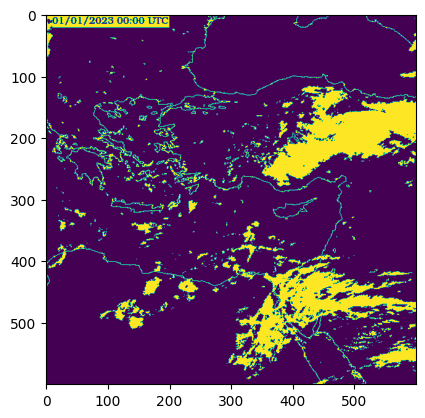

In [26]:
img_to_binary = np.vectorize(lambda pix : 255 if pix > 180 else 0)
img1_binary = img_to_binary(img1)
plt.imshow(img1_binary)

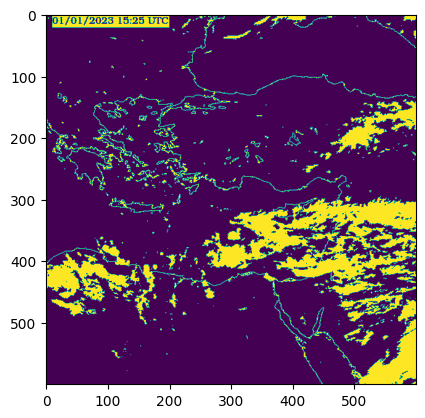

In [36]:
img_to_binary = np.vectorize(lambda pix : 255 if pix > 180 else 0)
img2_binary = img_to_binary(img2)
plt.imshow(img2_binary)

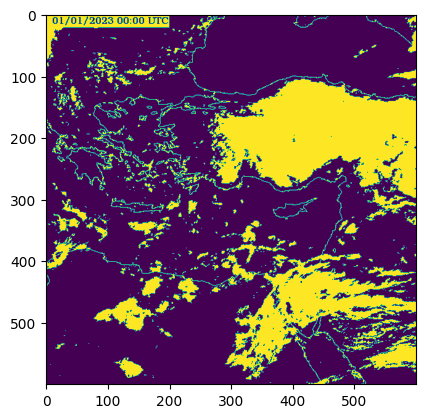

In [41]:
img_to_binary = np.vectorize(lambda pix : 255 if pix > 160 else 0)
img1_binary = img_to_binary(img1)
plt.imshow(img1_binary)

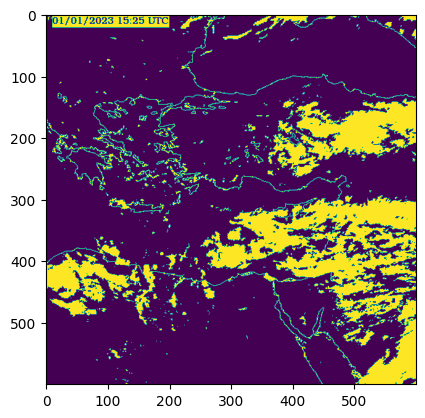

In [38]:
img_to_binary = np.vectorize(lambda pix : 255 if pix > 170 else 0)
img2_binary = img_to_binary(img2)
plt.imshow(img2_binary)

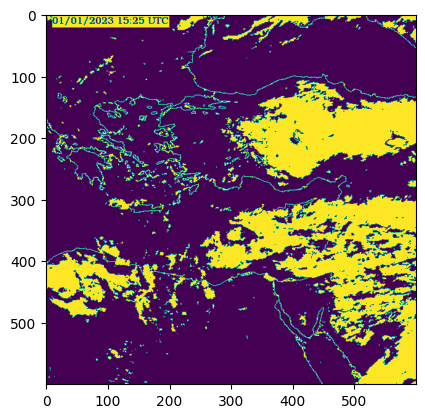

In [40]:
img_to_binary = np.vectorize(lambda pix : 255 if pix > 160 else 0)
img2_binary = img_to_binary(img2)
plt.imshow(img2_binary)

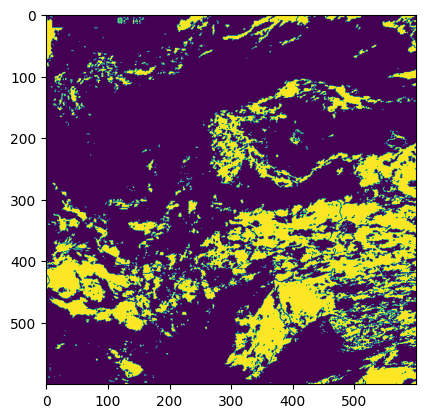

In [48]:
plt.imshow(np.abs(img1_binary - img2_binary))

In [46]:
from pysteps.verification.spatialscores import fss

print(fss(img1, img2, 160, 30))
print(fss(img1, img1, 160, 30))
print(fss(img1, img2, 160, 15))
print(fss(img1, img2, 160, 10))
print(fss(img1, img2, 160, 100))

0.7031656902522316
1.0
0.6582757623648169
0.6344023109413971
0.8182224500610462


In [50]:
img1 = get_img("/content/drive/MyDrive/data_from_IMS/ims_ir_png_samples/202301010000.png")
img2 = get_img("/content/drive/MyDrive/data_from_IMS/ims_ir_png_samples/202301010005.png")

img1_binary = img_to_binary(img1)
img2_binary = img_to_binary(img2)

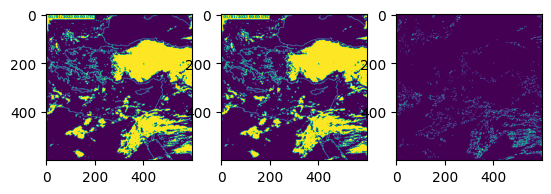

In [53]:
f, axarr = plt.subplots(1,3)
axarr[0].imshow(img1_binary)
axarr[1].imshow(img2_binary)
axarr[2].imshow(np.abs(img2_binary - img1_binary))

In [54]:
print(fss(img1, img2, 160, 30))
print(fss(img1, img1, 160, 30))
print(fss(img1, img2, 160, 15))
print(fss(img1, img2, 160, 10))
print(fss(img1, img2, 160, 100))

0.9996524136095369
1.0
0.9989642571747098
0.9979350495201271
0.9999365246652454


0.978134512267528
1.0
0.9535982609387262
0.9338516525417395
0.9952068218052665


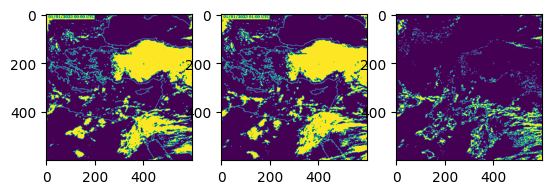

In [59]:
threshold = 160

img_to_binary = np.vectorize(lambda pix : 255 if pix > threshold else 0)

img1 = get_img("/content/drive/MyDrive/data_from_IMS/ims_ir_png_samples/202301010000.png")
img2 = get_img("/content/drive/MyDrive/data_from_IMS/ims_ir_png_samples/202301010100.png")

img1_binary = img_to_binary(img1)
img2_binary = img_to_binary(img2)

print(fss(img1, img2, threshold, 30))
print(fss(img1, img1, threshold, 30))
print(fss(img1, img2, threshold, 15))
print(fss(img1, img2, threshold, 10))
print(fss(img1, img2, threshold, 100))

f, axarr = plt.subplots(1,3)
axarr[0].imshow(img1_binary)
axarr[1].imshow(img2_binary)
axarr[2].imshow(np.abs(img2_binary - img1_binary))

In [61]:
import torch

loss = torch.nn.MSELoss()(torch.Tensor(img1 / 255), torch.Tensor(img2 / 255))

loss

tensor(0.0066)